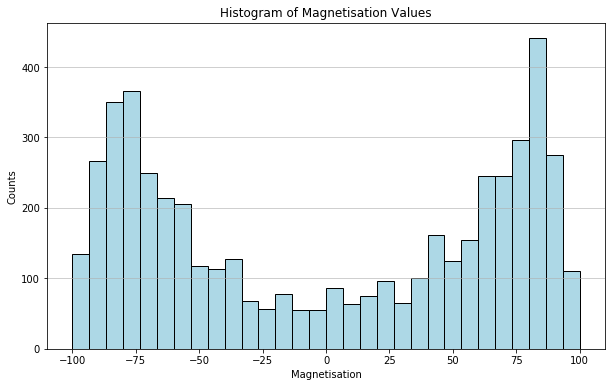

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import math

# data = []
# with open("dat.txt", "r") as file:
#     for line in file:
#         data.append(float(line.strip()))

input = np.genfromtxt('dat.txt', delimiter = ',', skip_header = 1, usecols = 0)


plt.figure(figsize=(10, 6))
plt.hist(input, bins=30, color='lightblue', edgecolor='black')
plt.title("Histogram of Magnetisation Values")
plt.xlabel("Magnetisation")
plt.ylabel("Counts")
plt.grid(axis='y', alpha=0.75)
plt.savefig('mag.png', dpi = 200)
plt.show()
